# 🧠 Étape 1 — Imports des librairies

In [9]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

# 🗂️ Étape 2 — Définir les chemins vers le dataset

In [10]:
from pathlib import Path

data_dir = Path("../data/processed/OpenAnimalTracks_split")
train_dir = data_dir / "train"
val_dir = data_dir / "val"
test_dir = data_dir / "test"

# 🧪 Étape 3 — Définir les transformations d’image
	•	Redimensionnement
	•	Normalisation
	•	Data Augmentation (pour l’entraînement uniquement)

In [11]:
#	•	Redimensionnement
#	•	Normalisation
#	•	Data Augmentation (pour l’entraînement uniquement)
img_size = (128, 128)

train_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])  # Pour images en niveaux de gris ou modifier si RGB
])

val_test_transforms = transforms.Compose([
    transforms.Resize(img_size),
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

# 🗃️ Étape 4 — Créer les datasets avec ImageFolder

In [12]:
train_dataset = datasets.ImageFolder(root=train_dir, transform=train_transforms)
val_dataset = datasets.ImageFolder(root=val_dir, transform=val_test_transforms)
test_dataset = datasets.ImageFolder(root=test_dir, transform=val_test_transforms)

# 🚚 Étape 5 — Créer les DataLoaders
	•	Batch size
	•	Shuffle pour train
	•	Num_workers

In [13]:
#	•	Batch size
#	•	Shuffle pour train
#	•	Num_workers
batch_size = 32
num_workers = 2

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=num_workers)

# 🔍 Étape 6 — Vérification de la structure des données
	•	Affichage des classes
	•	Visualisation de quelques images du DataLoader


In [14]:
#	•	Affichage des classes
#	•	Visualisation de quelques images du DataLoader
print("Classes :", train_dataset.classes)
print("Nombre de classes :", len(train_dataset.classes))

Classes : ['bernache du canada', 'castor', 'cerf mulet', 'cheval', 'coyote', 'dindon sauvage', 'écureuil gris occidental', 'éléphant', 'loutre de rivière', 'lynx roux', 'moufette', 'ours noir', 'puma', 'rat', 'raton laveur', 'renard gris', 'souris', "vison d'amérique"]
Nombre de classes : 18


# ⚙️ Étape 7 — Fonction utilitaire pour afficher les images
	•	Créer une fonction show_batch() ou similaire


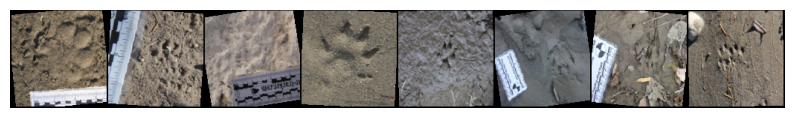

In [15]:
#	•	Créer une fonction show_batch() ou similaire
import torchvision

def denormalize(img_tensor):
    mean = torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)
    std = torch.tensor([0.5, 0.5, 0.5]).view(3, 1, 1)
    return img_tensor * std + mean

def show_batch(dataloader):
    images, labels = next(iter(dataloader))

    # Dénormalisation
    images = denormalize(images)

    # Affichage
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(torchvision.utils.make_grid(images[:8]).permute(1, 2, 0))
    plt.axis('off')
    plt.show()

show_batch(train_loader)

# ✅ Étape 8 — Résumé et préparation à l’entraînement
	•	Affichage des tailles
	•	Nombre de classes
	•	Prêt pour passer au notebook d’entraînement du modèle


In [16]:
#	•	Affichage des tailles
#	•	Nombre de classes
#	•	Prêt pour passer au notebook d’entraînement du modèle
print(f"Taille du dataset d'entraînement : {len(train_dataset)}")
print(f"Taille du dataset de validation : {len(val_dataset)}")
print(f"Taille du dataset de test : {len(test_dataset)}")
print(f"Nombre de classes : {len(train_dataset.classes)}")

Taille du dataset d'entraînement : 1719
Taille du dataset de validation : 493
Taille du dataset de test : 257
Nombre de classes : 18
